             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2    65
1    62
0    51
Name: clusters3id, dtype: int64

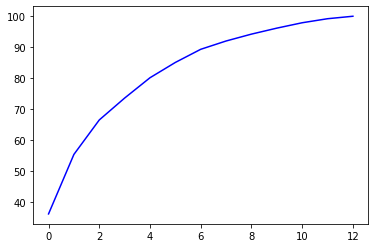

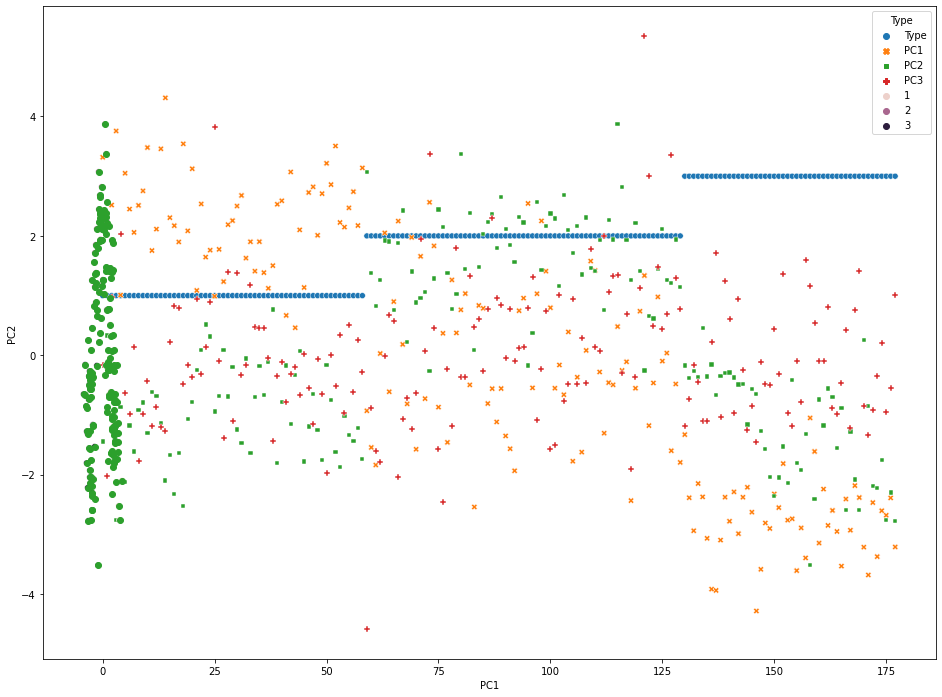

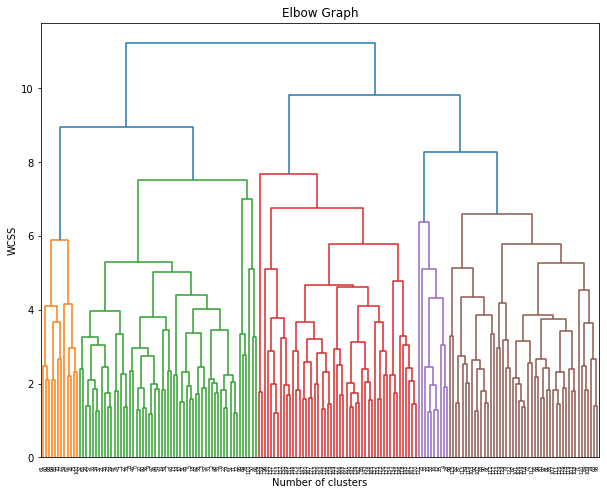

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

wine=pd.read_csv('D:\\excler\\Assignment\\PCA\\wine.csv')
print(wine.describe())
wine.head()

wine['Type'].value_counts()

Wine= wine.iloc[:,1:]
Wine

wine.shape

wine.info()

wine_ary=Wine.values
wine_ary

wine_norm=scale(wine_ary)
wine_norm

pca = PCA()
pca_values = pca.fit_transform(wine_norm)
pca_values

pca.components_

var = pca.explained_variance_ratio_
var

Var = np.cumsum(np.round(var,decimals= 4)*100)
Var

plt.plot(Var,color="blue");

final_df=pd.concat([wine['Type'],pd.DataFrame(pca_values[:,0:3],columns=['PC1','PC2','PC3'])],axis=1)
final_df

import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=final_df);

sns.scatterplot(data=final_df, x='PC1', y='PC2', hue='Type');

pca_values[: ,0:1]

x= pca_values[:,0:1]
y= pca_values[:,1:2]
plt.scatter(x,y);

# Hierarchical Clustering

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(wine_norm,'complete'))

hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

y=pd.DataFrame(hclusters.fit_predict(wine_norm),columns=['clustersid'])
y['clustersid'].value_counts()

wine2=wine.copy()
wine2['clustersid']=hclusters.labels_
wine2

# K-Means Clustering

from sklearn.cluster import KMeans

wcss=[]
for i in range (1,6):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(wine_norm)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,6),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

# K-3

clusters3=KMeans(3,random_state=30).fit(wine_norm)
clusters3

clusters3.labels_

wine3=wine.copy()
wine3['clusters3id']=clusters3.labels_
wine3

wine3['clusters3id'].value_counts()
